In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df1= pd.read_csv('takehome_users.csv', encoding='latin-1')
df2= pd.read_csv('takehome_user_engagement.csv')

In [4]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df1['object_id'].nunique()

12000

In [7]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
df2['user_id'].nunique()

8823

In [10]:
df1['creation_time']= pd.to_datetime(df1['creation_time'])

In [11]:
df1['last_session_creation_time']= pd.to_datetime(df1['last_session_creation_time'], unit='s')

In [54]:
df1['duration_usage']= df1['last_session_creation_time'] - df1['creation_time']
df1['duration_usage'] = df1['duration_usage'] / np.timedelta64(1, 'D')

In [55]:
df2['time_stamp']= pd.to_datetime(df2['time_stamp'])

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  duration_usage              8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [57]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration_usage
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0


In [58]:
df2.head()

,time_stamp,user_id,visited,adopted_user
0,2014-04-22 03:53:30,1,1,0
1,2013-11-15 03:45:04,2,1,1
2,2013-11-29 03:45:04,2,1,1
3,2013-12-09 03:45:04,2,1,1
4,2013-12-25 03:45:04,2,1,1


In [59]:
def find_adopted_users(df):
    adopted_users = set()
    user_login_dates = {}

    for _, row in df.iterrows():
        user_id = row['user_id']
        login_date = row['time_stamp'].date()

        if user_id not in user_login_dates:
            user_login_dates[user_id] = [login_date]
        else:
            user_login_dates[user_id].append(login_date)

        if len(user_login_dates[user_id]) < 3:
            continue

        login_dates = user_login_dates[user_id]
        login_dates.sort()  # Sort the login dates in ascending order

        for i in range(len(login_dates) - 2):
            start_date = login_dates[i]
            end_date = start_date + timedelta(days=6)

            if login_dates[i+2] <= end_date:
                adopted_users.add(user_id)
                break

    return adopted_users

In [60]:
adopted_users = find_adopted_users(df2)
print(len(adopted_users))
# print("Adopted Users:", adopted_users)

1602


In [61]:
df2['adopted_user']=0
for i in range(df2.shape[0]):
    if df2.loc[i,'user_id'] in adopted_users:
        df2.loc[i,'adopted_user']+=1 
    

In [62]:
df2.head()

,time_stamp,user_id,visited,adopted_user
0,2014-04-22 03:53:30,1,1,0
1,2013-11-15 03:45:04,2,1,1
2,2013-11-29 03:45:04,2,1,1
3,2013-12-09 03:45:04,2,1,1
4,2013-12-25 03:45:04,2,1,1


In [63]:
df2_clean= df2.groupby(['user_id', 'adopted_user'])['visited'].count()
df2_clean.head()

user_id  adopted_user
1        0                1
2        1               14
3        0                1
4        0                1
5        0                1
Name: visited, dtype: int64

In [64]:
df2_clean= pd.DataFrame(df2_clean)
df2_clean= df2_clean.reset_index()

In [65]:
df2_clean.head()

,user_id,adopted_user,visited
0,1,0,1
1,2,1,14
2,3,0,1
3,4,0,1
4,5,0,1


In [66]:
df= df1.merge(df2_clean, left_on='object_id', right_on='user_id')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  duration_usage              8823 non-null   float64       
 11  user_id                     8823 non-null   int64       

In [68]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration_usage,user_id,adopted_user,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0,2,1,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,3,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,4,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,5,0,1


In [69]:
df['opted_in_to_mailing_list'].unique()

array([1, 0])

In [70]:
df['enabled_for_marketing_drip'].unique()

array([0, 1])

In [71]:
df['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [72]:
df['org_id'].nunique()

417

In [73]:
df['invited_by_user_id'].nunique()

2229

In [74]:
df = pd.get_dummies(df, columns= ['creation_source','opted_in_to_mailing_list', 'enabled_for_marketing_drip'], drop_first= True)

In [75]:
df['opted_in_to_mailing_list_1']= np.int64(df['opted_in_to_mailing_list_1'])
df['enabled_for_marketing_drip_1']= np.int64(df['enabled_for_marketing_drip_1'])
df['creation_source_ORG_INVITE']= np.int64(df['creation_source_ORG_INVITE'])
df['creation_source_PERSONAL_PROJECTS']= np.int64(df['creation_source_PERSONAL_PROJECTS'])
df['creation_source_SIGNUP']= np.int64(df['creation_source_SIGNUP'])
df['creation_source_SIGNUP_GOOGLE_AUTH']= np.int64(df['creation_source_SIGNUP_GOOGLE_AUTH'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   object_id                           8823 non-null   int64         
 1   creation_time                       8823 non-null   datetime64[ns]
 2   name                                8823 non-null   object        
 3   email                               8823 non-null   object        
 4   last_session_creation_time          8823 non-null   datetime64[ns]
 5   org_id                              8823 non-null   int64         
 6   invited_by_user_id                  4776 non-null   float64       
 7   duration_usage                      8823 non-null   float64       
 8   user_id                             8823 non-null   int64         
 9   adopted_user                        8823 non-null   int64         
 10  visited                 

In [77]:
df['invited_by_user_id'].fillna(0, inplace=True)

In [78]:
df.drop(columns='object_id', inplace=True)

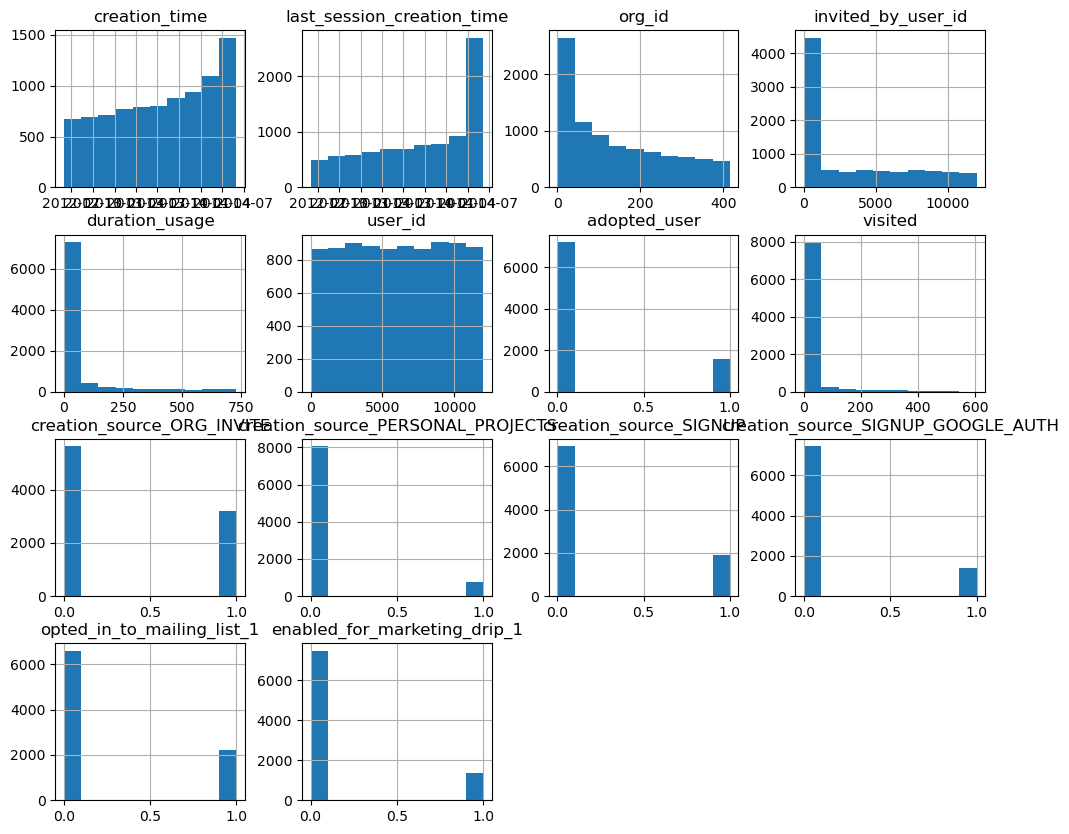

In [79]:
df.hist(figsize=(12,10));

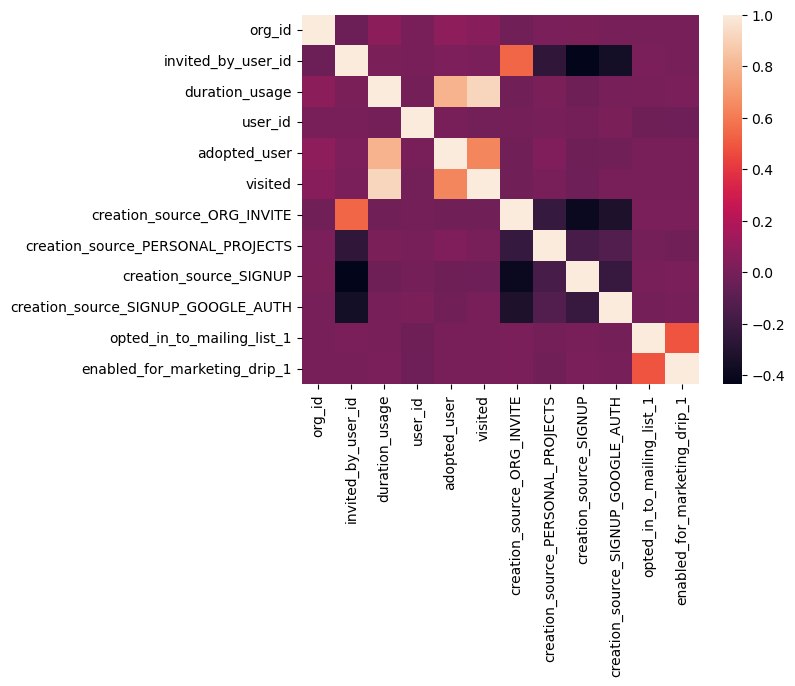

In [80]:

sns.heatmap(df.drop(columns= ['last_session_creation_time','creation_time', 'name', 'email']).corr());

From the heatmap we can see there are some correlations between `adopted_user` and `visited` which is the total number of times the user visited the product. 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   creation_time                       8823 non-null   datetime64[ns]
 1   name                                8823 non-null   object        
 2   email                               8823 non-null   object        
 3   last_session_creation_time          8823 non-null   datetime64[ns]
 4   org_id                              8823 non-null   int64         
 5   invited_by_user_id                  8823 non-null   float64       
 6   duration_usage                      8823 non-null   float64       
 7   user_id                             8823 non-null   int64         
 8   adopted_user                        8823 non-null   int64         
 9   visited                             8823 non-null   int64         
 10  creation_source_ORG_INVI

## 3- Modeling

**Train/Test Split**

In [82]:
X=df.drop(columns='adopted_user')
y=df.adopted_user

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6617, 15), (2206, 15), (6617,), (2206,))

In [85]:
#Save the `name` and `email` column
#from the train/test data into names_train and names_test and drop those columns from `X_train` and `X_test`. 

names_list=['name', 'email', 'last_session_creation_time','creation_time']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((6617, 11), (2206, 11))

In [86]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

org_id                                  int64
invited_by_user_id                    float64
duration_usage                        float64
user_id                                 int64
visited                                 int64
creation_source_ORG_INVITE              int64
creation_source_PERSONAL_PROJECTS       int64
creation_source_SIGNUP                  int64
creation_source_SIGNUP_GOOGLE_AUTH      int64
opted_in_to_mailing_list_1              int64
enabled_for_marketing_drip_1            int64
dtype: object

### 3.1- Decision Tree

In [87]:
d= [i for i in range(1,10)]
training_accuracy=[]
testing_accuracy=[]

for max_d in d:
    entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234, max_depth=max_d, class_weight='balanced')
    entr_model.fit(X_train,y_train)
    y_tr_pred1 = entr_model.predict(X_train) 
    y_te_pred1 = entr_model.predict(X_test)
    tr_accuracy= metrics.recall_score(y_train,y_tr_pred1)
    training_accuracy.append(tr_accuracy)
    te_accuracy= metrics.recall_score(y_test,y_te_pred1)
    testing_accuracy.append(te_accuracy)
    

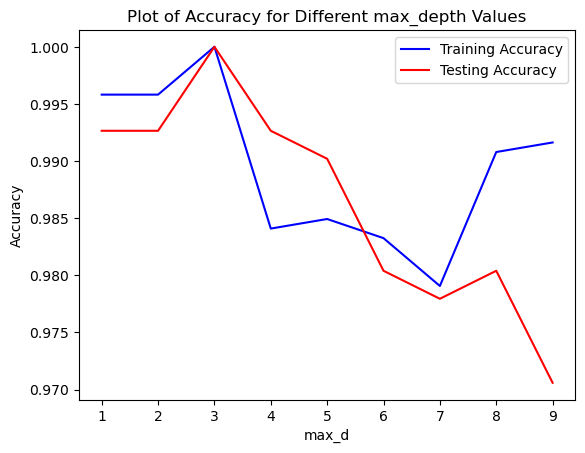

In [88]:
plt.plot(d, training_accuracy, color='blue', label='Training Accuracy')
plt.plot(d, testing_accuracy, color='red', label='Testing Accuracy')
plt.legend()
plt.xlabel('max_d')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy for Different max_depth Values')
plt.show();

In [89]:
max_d=3
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234, max_depth=max_d, class_weight='balanced')
entr_model.fit(X_train,y_train)
y_pred1 = entr_model.predict(X_train) 
y_pred1 = pd.Series(y_pred1) 

# model evaluation 
print("Model: Entropy model, max_depth= {}".format(max_d))
print("Accuracy:", metrics.accuracy_score(y_train,y_pred1))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred1))
print('Precision score:' , metrics.precision_score(y_train,y_pred1))
print('Recall score:' , metrics.recall_score(y_train,y_pred1))
print('F1 score:' , metrics.f1_score(y_train,y_pred1))


Model: Entropy model, max_depth= 3
Accuracy: 0.9505818346682787
Balanced accuracy: 0.9698506361792365
Precision score: 0.7850098619329389
Recall score: 1.0
F1 score: 0.8795580110497238


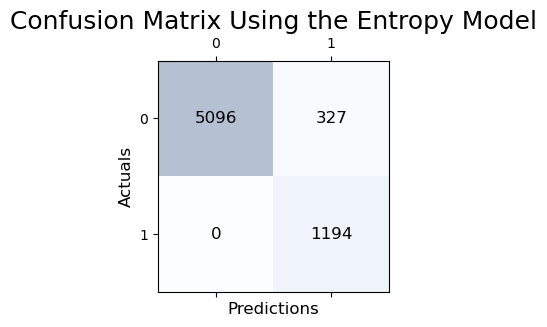

In [90]:
conf_matrix1 = confusion_matrix(y_true=y_train, y_pred=y_pred1)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size=12)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix Using the Entropy Model', fontsize=18)
plt.show()

### 3.2- Random Forest

In [91]:
RF_Model = RandomForestClassifier(random_state=1234)
RF_Model.fit(X_train, y_train)
y_pred3 = RF_Model.predict(X_train) 
y_pred3 = pd.Series(y_pred3) 

# model evaluation 
print("Model: Random Forest Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred3))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred3))
print('Precision score:' , metrics.precision_score(y_train,y_pred3))
print('Recall score:' , metrics.recall_score(y_train,y_pred3))
print('F1 score:' , metrics.f1_score(y_train,y_pred3))

Model: Random Forest Model
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


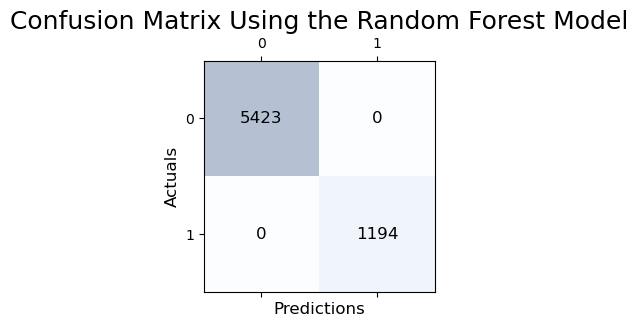

In [92]:
conf_matrix3 = confusion_matrix(y_true=y_train, y_pred=y_pred3)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix3.shape[0]):
    for j in range(conf_matrix3.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix3[i, j], va='center', ha='center', size=12)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix Using the Random Forest Model', fontsize=18)
plt.show()

### 3.3- Gradient Boosting

In [93]:
GB_Model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
GB_Model.fit(X_train, y_train)
y_pred4 = GB_Model.predict(X_train) 
y_pred4 = pd.Series(y_pred4) 

# model evaluation 
print("Model: Gradient Boosting Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred4))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred4))
print('Precision score:' , metrics.precision_score(y_train,y_pred4))
print('Recall score:' , metrics.recall_score(y_train,y_pred4))
print('F1 score:' , metrics.f1_score(y_train,y_pred4))

Model: Gradient Boosting Model
Accuracy: 1.0
Balanced accuracy: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


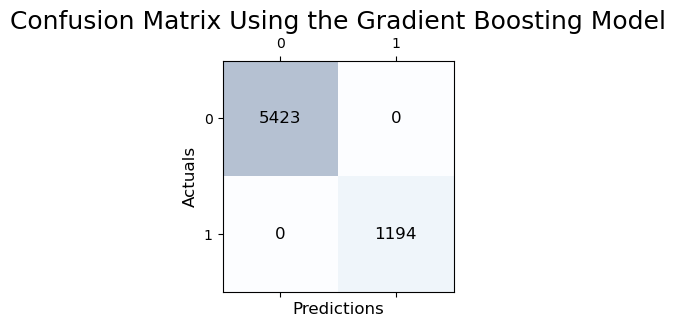

In [94]:
conf_matrix4 = confusion_matrix(y_true=y_train, y_pred=y_pred4)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix4, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix4.shape[0]):
    for j in range(conf_matrix4.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix4[i, j], va='center', ha='center', size=12)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix Using the Gradient Boosting Model', fontsize=18)
plt.show()

### 3.2- K Nearest Neighbor

In [95]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred8= knn.predict(X_train)
y_pred8 = pd.Series(y_pred8) 

# model evaluation 
print("Model: KNN Classifier Model")
print("Accuracy:", metrics.accuracy_score(y_train,y_pred8))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_train,y_pred8))
print('Precision score:' , metrics.precision_score(y_train,y_pred8))
print('Recall score:' , metrics.recall_score(y_train,y_pred8))
print('F1 score:' , metrics.f1_score(y_train,y_pred8))

Model: KNN Classifier Model
Accuracy: 0.9186942723288499
Balanced accuracy: 0.7773193523089046
Precision score: 0.9880952380952381
Recall score: 0.5561139028475712
F1 score: 0.7116827438370846


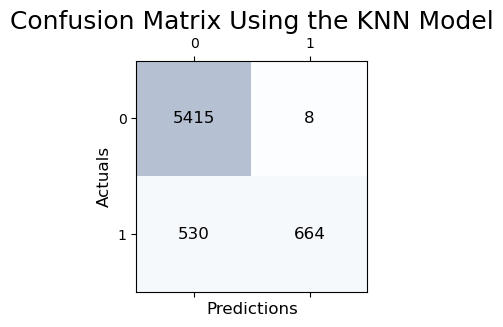

In [96]:
conf_matrix8 = confusion_matrix(y_true=y_train, y_pred=y_pred8)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix8, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix8.shape[0]):
    for j in range(conf_matrix8.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix8[i, j], va='center', ha='center', size=12)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix Using the KNN Model', fontsize=18)
plt.show()

## 4- Final Model

Several different models were implemented and the final scores were evaluated. The results showed that Random Forest had the highest accuracy (99%), F1 score (99%) and precision (98%) and therefore was the best model.

### 4.1- Model Hyperparameter Tuning

In [97]:
#Perform GridSearchCV to find the best model parameters

param_grid = {'max_depth': np.arange(1, 10), 'criterion':['gini', 'entropy']}

model_cv= GridSearchCV(RF_Model, param_grid, cv=5 , scoring='recall')

In [98]:
model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall')

In [99]:
model_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### 4.2 Predict The Test Data Using The Best Model

In [100]:
y_test_pred = model_cv.best_estimator_.predict(X_test) 

In [101]:
# model evaluation 
print("Model: RandomForest Model Best Estimator")
print("Accuracy:", metrics.accuracy_score(y_test,y_test_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_test_pred))
print('Precision score:' , metrics.precision_score(y_test,y_test_pred))
print('Recall score:' , metrics.recall_score(y_test,y_test_pred))
print('F1 score:' , metrics.f1_score(y_test,y_test_pred))

Model: RandomForest Model Best Estimator
Accuracy: 0.9841341795104261
Balanced accuracy: 0.9807929289624637
Precision score: 0.9408983451536643
Recall score: 0.9754901960784313
F1 score: 0.9578820697954272


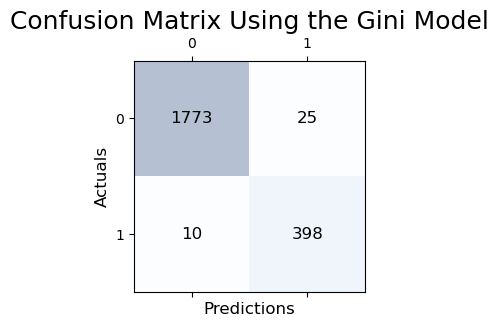

In [102]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=12)

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix Using the Gini Model', fontsize=18)
plt.show()

### 4.3- Most important features

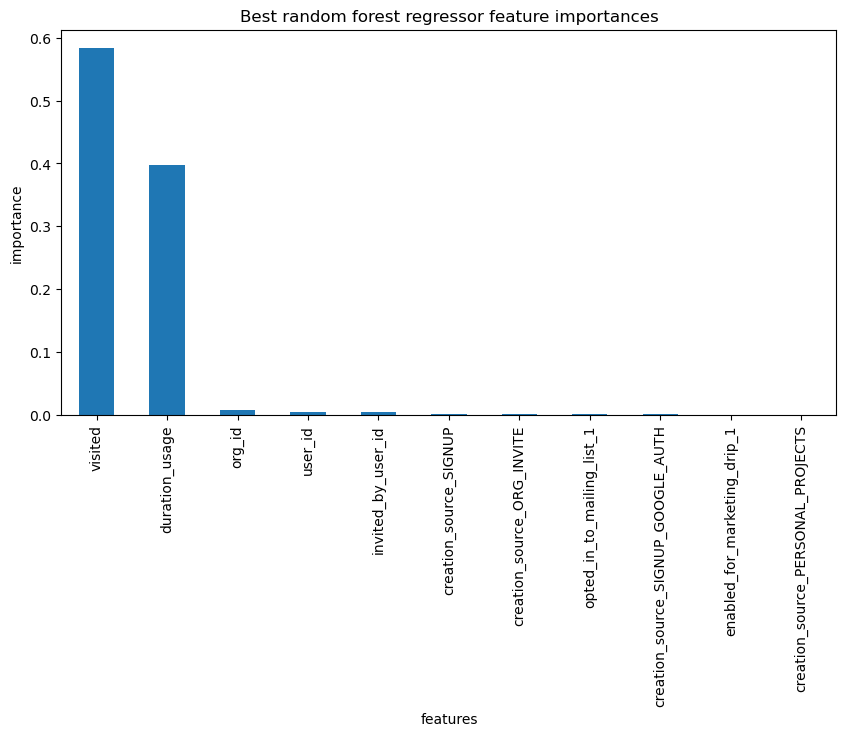

In [103]:
plt.subplots(figsize=(10, 5))
imps = model_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');